In [1]:
import os

print( os.getcwd())

c:\Users\Haolong\Documents\GitHub\zika_project(reformatted)\zika_project(reformatted)\src\test


In [2]:
# go to test_results folder, 
# read all the files , store into a list 
# each file is a matrix of the same shape;
# try to calculate the average matrix over the list 

In [ ]:
'test/test_results/simulation_1_933.npy'

In [9]:
import os
import numpy as np

# Define the folder where the test results are stored
folder_path = "test_results"

# Get a list of all `.npy` files in the folder
file_names = [f for f in os.listdir(folder_path) if f.endswith(".npy")]

# Initialize a list to store the matrices
matrices = []

# Load each `.npy` file and append the matrices to the list
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    matrix = np.load(file_path)
    matrices.append(matrix)

# for i in range(12):
#     file_name = f'simulation_{i+1}.npy'
#     file_path = os.path.join(folder_path, file_name)
#     matrix = np.load(file_path)
#     matrices.append(matrix)



# Calculate the average matrix across all matrices
average_matrix = np.mean(matrices, axis=0)

# Display the average matrix
print("Average Matrix:")
print(average_matrix)

# Optionally, save the average matrix to a new `.npy` file
output_path = os.path.join(folder_path, "average_matrix.npy")
np.save(output_path, average_matrix)

print(f"Average matrix saved to {output_path}")


Average Matrix:
[[0.0000000e+00 4.1597770e+06 1.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 4.1597750e+06 2.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [2.0000000e+00 4.1597720e+06 5.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [3.6470000e+03 4.1593789e+06 5.5000000e-01 ... 4.0785000e+02
  0.0000000e+00 2.7695000e+02]
 [3.6480000e+03 4.1593789e+06 4.5000000e-01 ... 4.0815000e+02
  1.0000000e-01 2.7705000e+02]
 [3.6490000e+03 4.1593788e+06 5.0000000e-01 ... 4.0840000e+02
  5.0000000e-02 2.7710000e+02]]
Average matrix saved to test_results\average_matrix.npy


In [3]:
# get every daily 
import pandas as pd
import numpy as np
daily_cases = []
cases_simu = []
num_year = 10
year_indices = [365 * (i ) for i in range(num_year)]  # 3650 days / 365 days per year = 10 years

for mat in matrices:

    df = pd.DataFrame(mat, columns=['T','S', 'E', 'I', 'R','new_I','total_I'])
    daily_cases.append(np.mean(df['new_I']))


# Get accumulated cases at the end of each year
    accumulated_cases_per_year = [df.loc[idx, 'total_I'] for idx in year_indices]

# Calculate cases accumulated each year by taking the difference between consecutive years
# You can use `numpy.diff` to compute the differences between consecutive values in a list/array

    cases_per_year = np.diff([0] + accumulated_cases_per_year)
    cases_per_year = cases_per_year[1:]
    cases_simu.append(cases_per_year)




In [4]:
cases_per_year

array([57, 61,  1, 12, 36, 29, 33, 11,  5])

In [5]:
cases_simu

[array([60, 28,  5,  1, 27, 13, 35, 22, 29]),
 array([44, 69, 20, 13, 54, 24, 12, 22, 53]),
 array([36, 31,  4, 32, 39, 54, 15, 27, 60]),
 array([58, 29, 73, 17, 45, 32, 36, 30, 38]),
 array([28, 26, 22, 10, 30, 26, 26,  4, 26]),
 array([65, 36,  9, 27, 16,  6, 33, 10, 20]),
 array([59, 21, 15, 57, 89, 28, 36, 15, 15]),
 array([68,  7, 12, 36,  6, 26, 34, 13, 12]),
 array([56, 18, 46, 27, 38, 49, 38,  4,  5]),
 array([40, 19, 37, 27, 19, 10,  8, 38, 30]),
 array([58, 26, 59, 59, 13,  6, 18, 10, 27]),
 array([56, 17,  8, 12, 12, 33, 34, 50, 14]),
 array([60, 24, 32, 12, 10, 23, 68, 26, 22]),
 array([63, 23, 15,  6,  8, 25, 34, 25,  8]),
 array([63, 22, 39, 20, 18, 10, 13, 38, 18]),
 array([58, 47, 29, 17, 33, 43, 17, 84,  8]),
 array([33, 19,  3, 42, 35,  4, 11, 16,  9]),
 array([58, 16, 37, 10, 26, 17, 29, 16, 31]),
 array([63, 22, 19, 14, 31, 13, 20, 20, 40]),
 array([57, 61,  1, 12, 36, 29, 33, 11,  5])]

In [6]:
cases_matrix.shape

NameError: name 'cases_matrix' is not defined

In [ ]:
cases_matrix

In [40]:
np.median(cases_matrix)

451.0

In [37]:
np.std(cases_matrix)

1288.0305870630077

In [38]:
q25 = np.percentile(cases_matrix, 25)
q75 = np.percentile(cases_matrix, 75)

print("25th percentile:", q25)
print("75th percentile:", q75)

25th percentile: 179.25
75th percentile: 826.5


In [41]:
cases_matrix 


array([[ 594,  192,  434, 1836, 4884, 2424, 2094,  273,  272],
       [ 451,  336,  210,   57,   18,  129,  270,  145,   46],
       [ 559, 1693, 1158,  373,  500, 1476,  180,   57,  301],
       [ 461,  454,  293,  498, 1734, 2989,  538,   57,  120],
       [ 451,  157,  120,  168,  200,  398,  450,  511,  306],
       [ 451,  157,  120,  144,  174,  555,  967,   64,   84],
       [ 661,  216,  152, 1005,  144,  382,  725,  744, 1398],
       [ 821, 1171,  177,  154,  351,  676,  477,  163,  253],
       [ 303,  517,  522,  428,  137,  286,  530,  768,  279],
       [ 451, 1167, 2387, 2244, 3956, 7781, 3678, 1163,  607],
       [1554, 4704, 2364, 2453,  527,  660,  767, 2898, 6453],
       [ 451,  157,  188,   74,  456,  843,  374,  103,   19]],
      dtype=int64)

In [48]:
row_sums = np.sum(cases_matrix, axis=1)

# Calculate mean and standard deviation of row sums
mean_row_sums = np.mean(row_sums)
std_row_sums = np.std(row_sums)

print("Row Sums:", row_sums)
print("Mean of Row Sums:", mean_row_sums)
print("Standard Deviation of Row Sums:", std_row_sums)

Row Sums: [13003  1662  6297  7144  2761  2716  5427  4243  3770 23434 22380  2665]
Mean of Row Sums: 7958.5
Standard Deviation of Row Sums: 7281.618221018365


In [74]:
cases_matrix

array([[ 594,  192,  434, 1836, 4884, 2424, 2094,  273,  272],
       [ 451,  336,  210,   57,   18,  129,  270,  145,   46],
       [ 559, 1693, 1158,  373,  500, 1476,  180,   57,  301],
       [ 461,  454,  293,  498, 1734, 2989,  538,   57,  120],
       [ 451,  157,  120,  168,  200,  398,  450,  511,  306],
       [ 451,  157,  120,  144,  174,  555,  967,   64,   84],
       [ 661,  216,  152, 1005,  144,  382,  725,  744, 1398],
       [ 821, 1171,  177,  154,  351,  676,  477,  163,  253],
       [ 303,  517,  522,  428,  137,  286,  530,  768,  279],
       [ 451, 1167, 2387, 2244, 3956, 7781, 3678, 1163,  607],
       [1554, 4704, 2364, 2453,  527,  660,  767, 2898, 6453],
       [ 451,  157,  188,   74,  456,  843,  374,  103,   19]],
      dtype=int64)

In [7]:
row_sums = np.sum(cases_matrix, axis=1) 

# Plotting the bar plot
plt.figure(figsize=(8, 6))
plt.bar(np.arange(len(row_sums)), row_sums, color='grey', alpha=0.7)
plt.xlabel('Simulations')
plt.ylabel('Cases')
plt.title('Total Zika Cases for 10 years from each Simulation')
plt.xticks(np.arange(len(row_sums)), np.arange(1, len(row_sums) + 1))
plt.grid(axis='y')

plt.show()

NameError: name 'cases_matrix' is not defined

In [78]:
np.median(row_sums)

4835.0

In [77]:
np.std(row_sums)

7281.618221018365

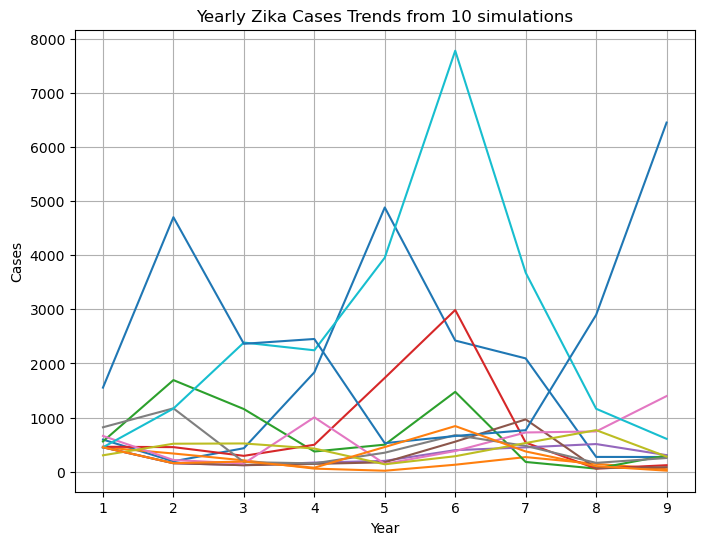

In [47]:

# Plotting the multi-line plot
plt.figure(figsize=(8, 6))

# Plot each row as a line
for i in range(cases_matrix.shape[0]):
    plt.plot(range(1, cases_matrix.shape[1] + 1), cases_matrix[i], label=f'Trend {i+1}')

plt.xlabel('Year')
plt.ylabel('Cases')
plt.title('Yearly Zika Cases Trends from 10 simulations')
#plt.legend()  # Show legend with trend labels
plt.grid(True)

plt.show()

In [64]:
cases_simu

[array([ 594,  192,  434, 1836, 4884, 2424, 2094,  273,  272]),
 array([451, 336, 210,  57,  18, 129, 270, 145,  46]),
 array([ 559, 1693, 1158,  373,  500, 1476,  180,   57,  301]),
 array([ 461,  454,  293,  498, 1734, 2989,  538,   57,  120]),
 array([451, 157, 120, 168, 200, 398, 450, 511, 306]),
 array([451, 157, 120, 144, 174, 555, 967,  64,  84]),
 array([ 661,  216,  152, 1005,  144,  382,  725,  744, 1398]),
 array([ 821, 1171,  177,  154,  351,  676,  477,  163,  253]),
 array([303, 517, 522, 428, 137, 286, 530, 768, 279]),
 array([ 451, 1167, 2387, 2244, 3956, 7781, 3678, 1163,  607]),
 array([1554, 4704, 2364, 2453,  527,  660,  767, 2898, 6453], dtype=int64),
 array([451, 157, 188,  74, 456, 843, 374, 103,  19], dtype=int64)]

In [60]:
column_means = np.mean(cases_simu, axis=0)


In [68]:
column_means 

array([ 600.66666667,  910.08333333,  677.08333333,  786.16666667,
       1090.08333333, 1549.91666667,  920.83333333,  578.83333333,
        844.83333333])

In [70]:
np.mean(column_means )

884.2777777777778

In [71]:
np.std(column_means )

281.9133151944949

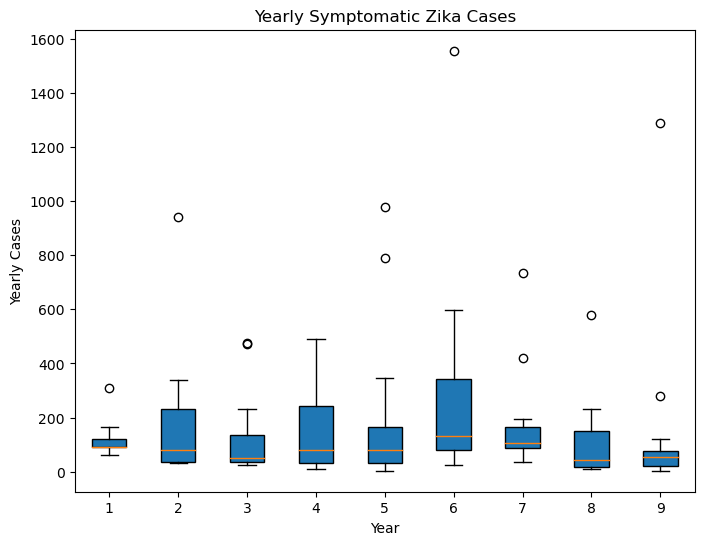

In [56]:
cases_matrix = np.vstack(cases_simu)

# Plotting the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(cases_matrix * 0.2, patch_artist=True)
plt.xlabel('Year')
plt.ylabel('Yearly Cases')
plt.title('Yearly Symptomatic Zika Cases')
plt.xticks(np.arange(1, cases_matrix.shape[1] + 1), np.arange(1, cases_matrix.shape[1] + 1))
plt.grid(False)
plt.show()

In [17]:
np.mean(daily_cases)

2.434041095890411

In [20]:
from scipy import stats
sem =np.std(daily_cases)
mean = np.mean(daily_cases)
ci = stats.t.interval(0.95, len(daily_cases)-1, loc=mean, scale=sem)

In [21]:
ci

(-2.223113061069369, 7.0911952528501905)

In [54]:
sem

2.1159407348227033

In [18]:
np.std(daily_cases)

2.1159407348227033

In [4]:
file_name

'simulation_12.npy'

In [19]:
file_path ='test_results/simulation_1_933.npy'
matrix = np.load(file_path)

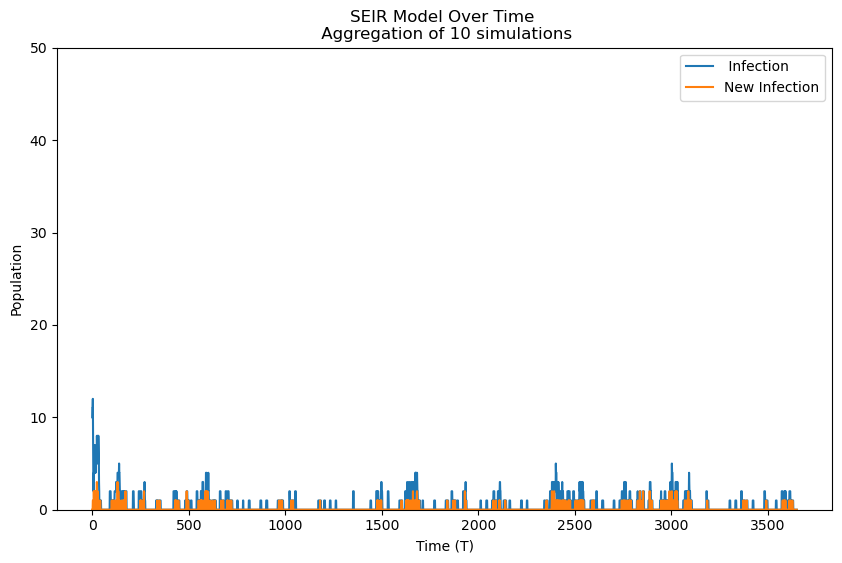

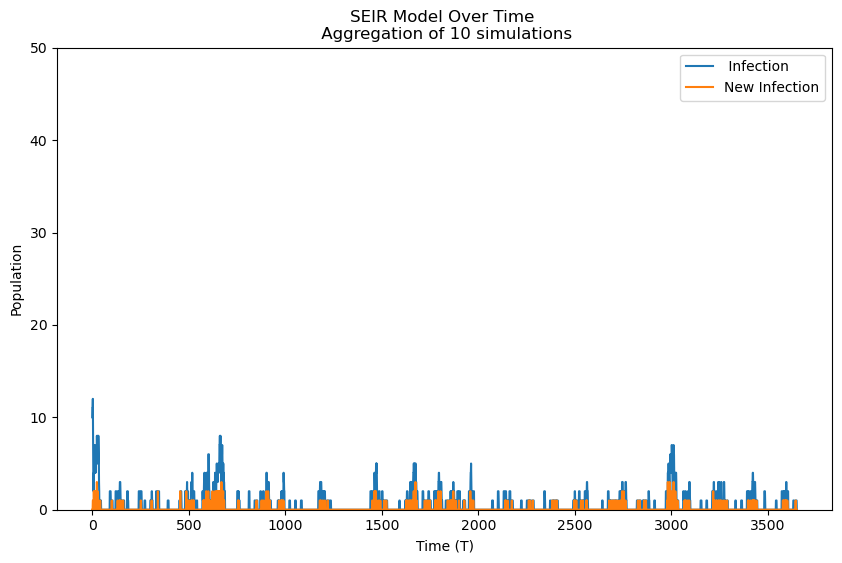

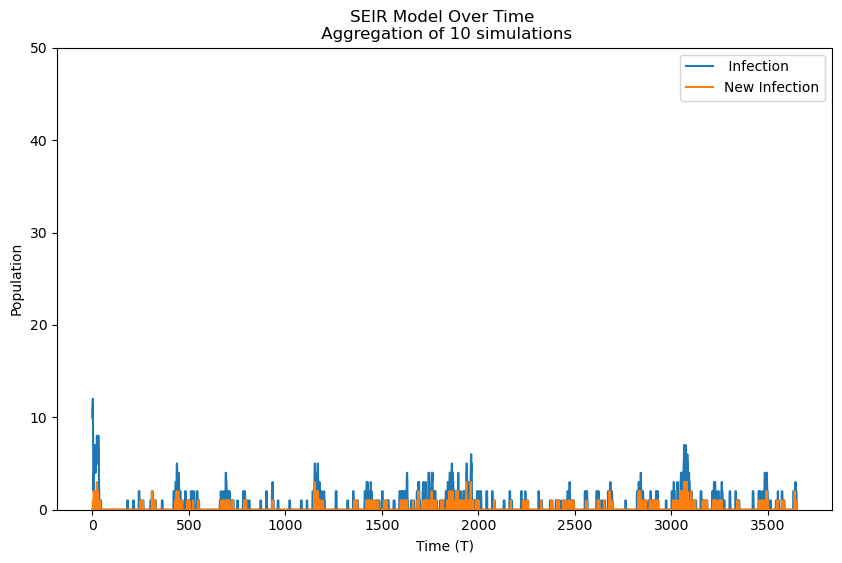

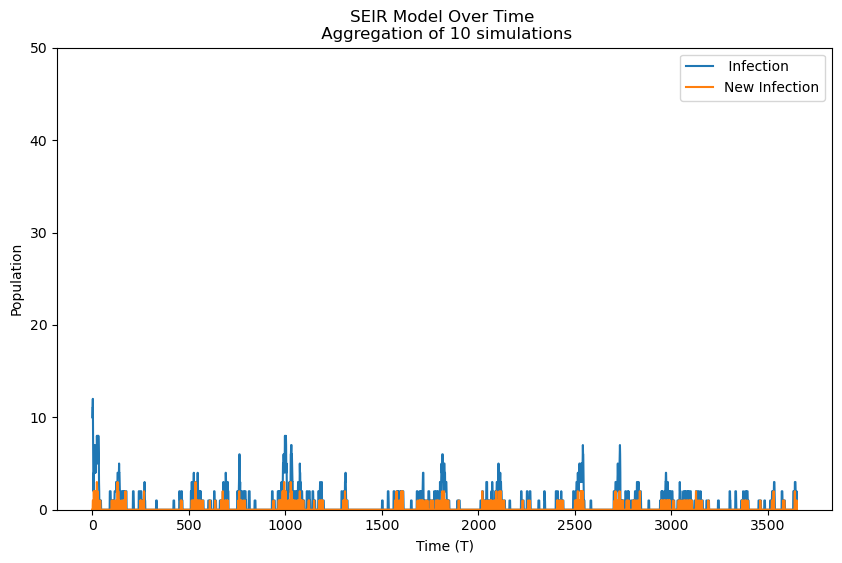

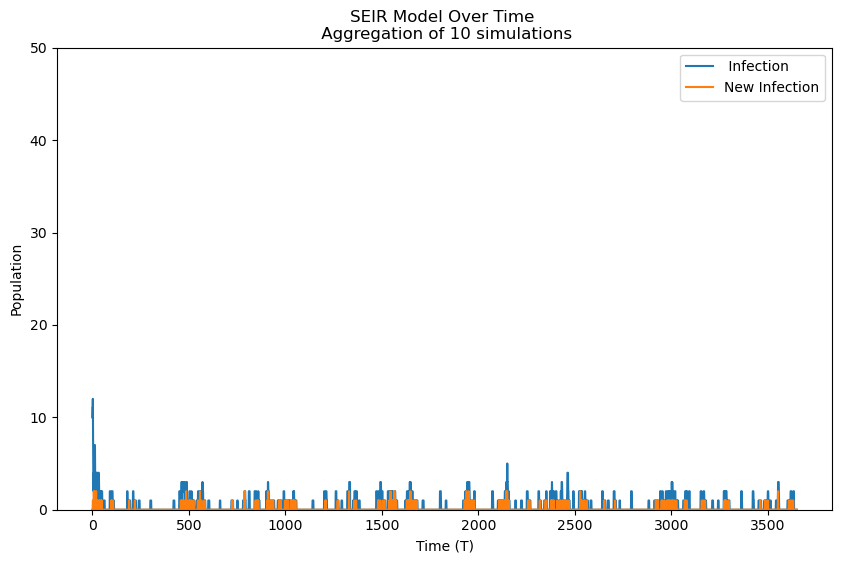

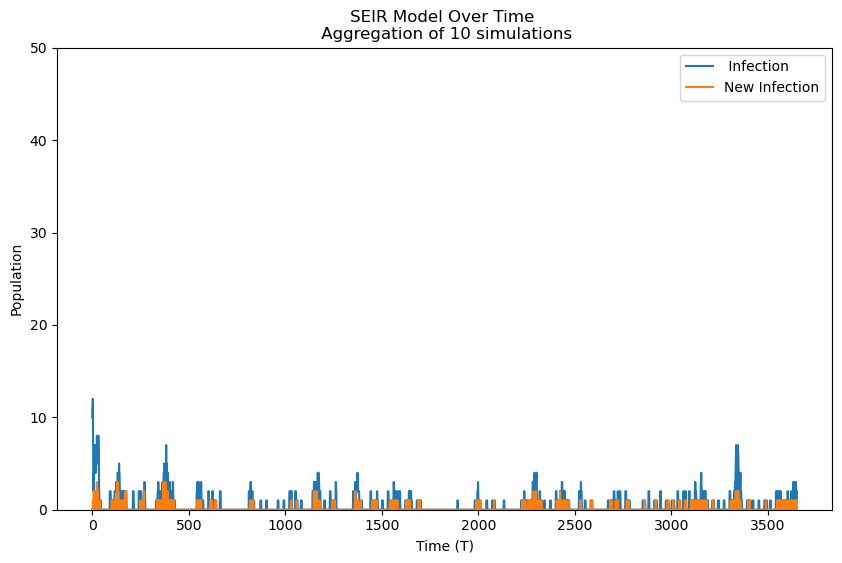

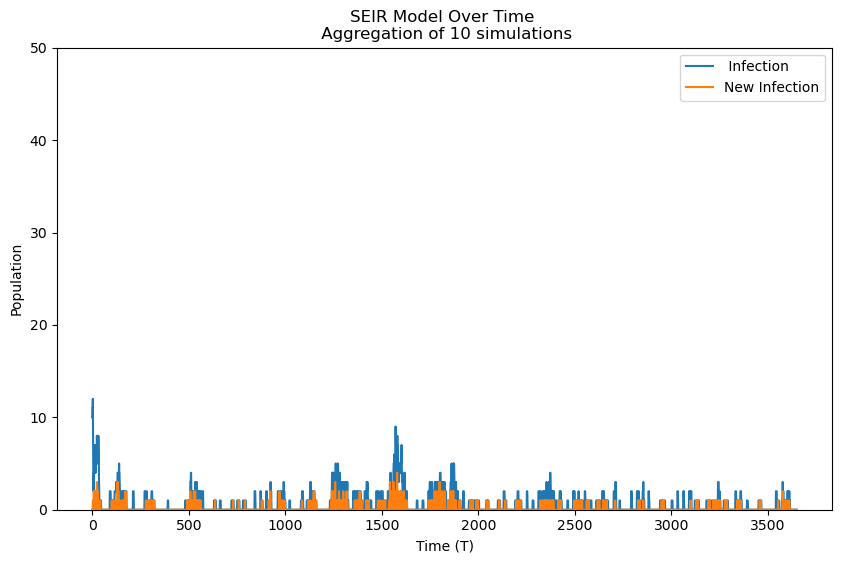

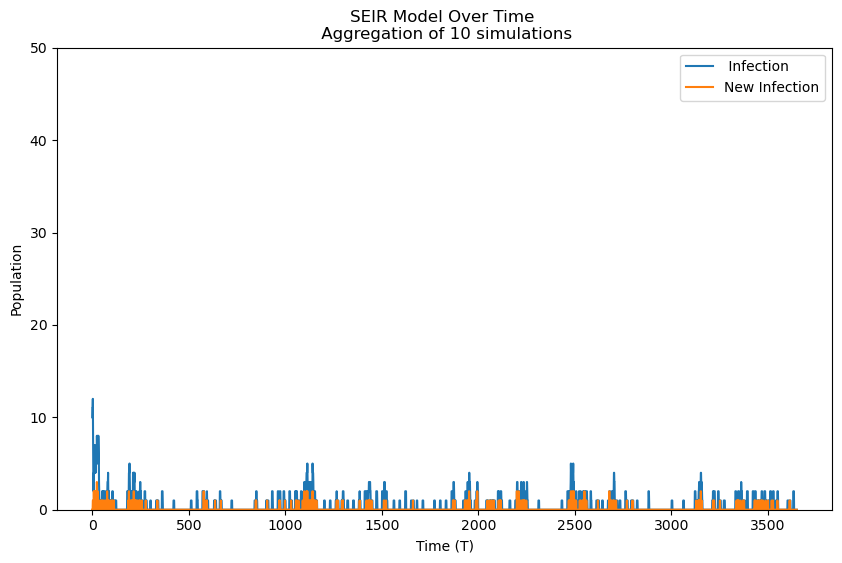

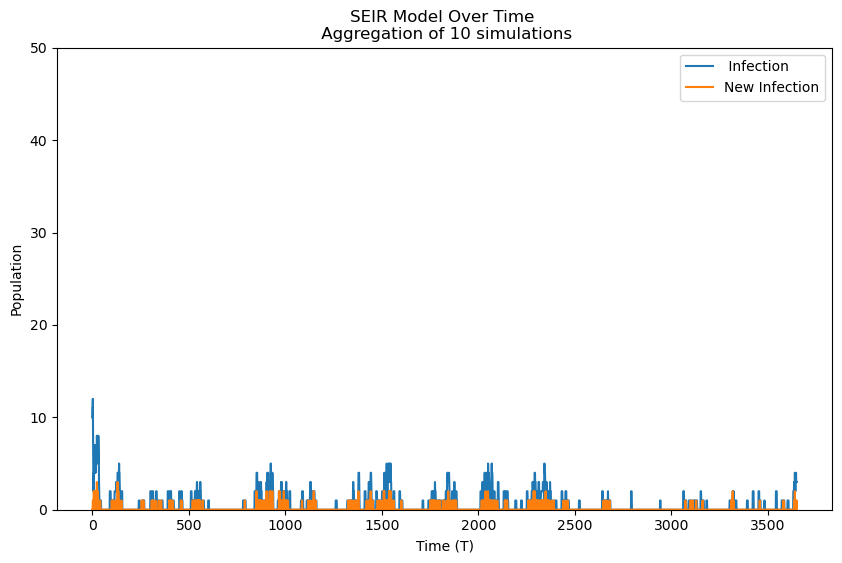

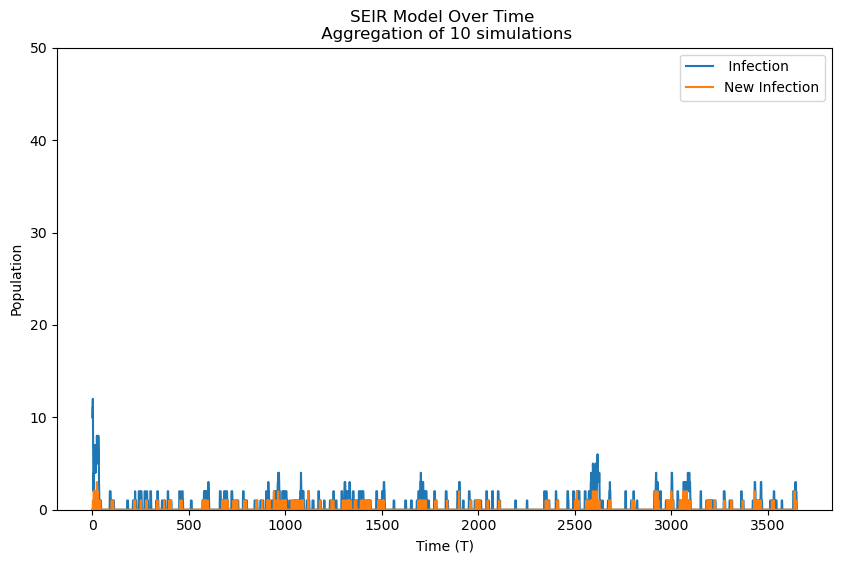

In [26]:

for i  in range(10):
    df = pd.DataFrame(matrices[i], columns=['T','S', 'E', 'I', 'R','new_I','total_I'])


    plt.figure(figsize=(10, 6))
    plt.plot(df['T'], df['I'], label=' Infection')
    plt.plot(df['T'], df['new_I'], label='New Infection')

    plt.xlabel('Time (T)')
    plt.ylabel('Population')
    plt.ylim(0,50)
    plt.title('SEIR Model Over Time \n Aggregation of 10 simulations')
    plt.legend()
    plt.show()

In [34]:
file_path ='test_results/simulation_1_933.npy'
matrix = np.load(file_path)

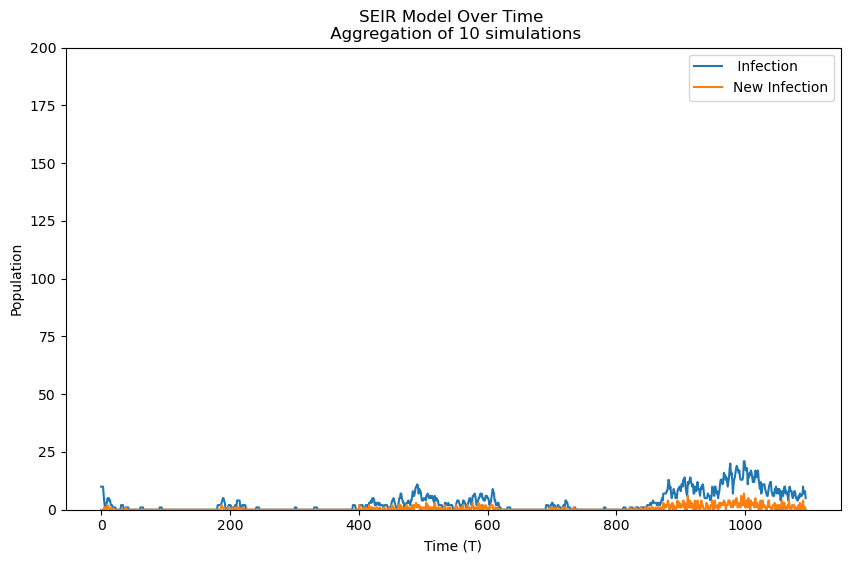

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(matrix, columns=['T','S', 'E', 'I', 'R','new_I','total_I'])


plt.figure(figsize=(10, 6))
plt.plot(df['T'], df['I'], label=' Infection')
plt.plot(df['T'], df['new_I'], label='New Infection')

plt.xlabel('Time (T)')
plt.ylabel('Population')
plt.ylim(0,200)
plt.title('SEIR Model Over Time \n Aggregation of 10 simulations')
plt.legend()
plt.show()

In [36]:
matrix[1000:]

array([[   1000, 6052220,      15,      19,     455,       1,     427],
       [   1001, 6052214,      20,      17,     458,       1,     428],
       [   1002, 6052212,      18,      18,     461,       4,     432],
       [   1003, 6052209,      18,      18,     464,       3,     435],
       [   1004, 6052205,      21,      11,     472,       1,     436],
       [   1005, 6052204,      17,      15,     473,       5,     441],
       [   1006, 6052204,      14,      14,     477,       3,     444],
       [   1007, 6052204,      11,      16,     478,       3,     447],
       [   1008, 6052201,      14,      15,     479,       0,     447],
       [   1009, 6052198,      13,      17,     481,       4,     451],
       [   1010, 6052194,      14,      16,     485,       3,     454],
       [   1011, 6052187,      19,      14,     489,       2,     456],
       [   1012, 6052186,      18,      12,     493,       2,     458],
       [   1013, 6052183,      18,      14,     494,       3,   

In [17]:
# temp
# initial cases are not important 


In [27]:
matrices[0][0:50,]

array([[      0, 4159777,       1,      10,       0,       0,       0],
       [      1, 4159775,       2,      11,       0,       0,       0],
       [      2, 4159772,       5,      11,       0,       0,       0],
       [      3, 4159772,       4,      12,       0,       1,       1],
       [      4, 4159767,       8,       8,       5,       1,       2],
       [      5, 4159767,       8,       3,      10,       0,       2],
       [      6, 4159767,       8,       2,      11,       0,       2],
       [      7, 4159767,       8,       2,      11,       0,       2],
       [      8, 4159767,       6,       4,      11,       2,       4],
       [      9, 4159766,       6,       4,      12,       1,       5],
       [     10, 4159766,       5,       5,      12,       1,       6],
       [     11, 4159765,       5,       5,      13,       1,       7],
       [     12, 4159763,       5,       7,      13,       2,       9],
       [     13, 4159761,       6,       7,      14,       1,   

In [6]:
np.mean(df['new_I'])
#np.sd(df['new_I'])

2.434041095890411

In [7]:
np.std(df['new_I'])

1.118961331333847

In [8]:
import pandas as pd
import numpy as np
from scipy import stats

mean = df['new_I'].mean()
std_dev = df['new_I'].std()
sample_size = len(df['new_I'])

# Determine the critical value from t-distribution
# Degrees of freedom (sample size minus one)
degrees_freedom = sample_size - 1

confidence_level = 0.95
alpha = 1 - confidence_level
t_critical = stats.t.ppf(1 - alpha/2, degrees_freedom)

# Calculate the standard error of the mean
standard_error = std_dev / np.sqrt(sample_size)

# Calculate the margin of error
margin_of_error = t_critical * standard_error

# Get the lower and upper bounds for the 95% CI
ci_lower = mean - margin_of_error
ci_upper = mean + margin_of_error

# Output the 95% CI
print("95% Confidence Interval for 'new_I':", (ci_lower, ci_upper))

95% Confidence Interval for 'new_I': (2.397723230428809, 2.4703589613520127)


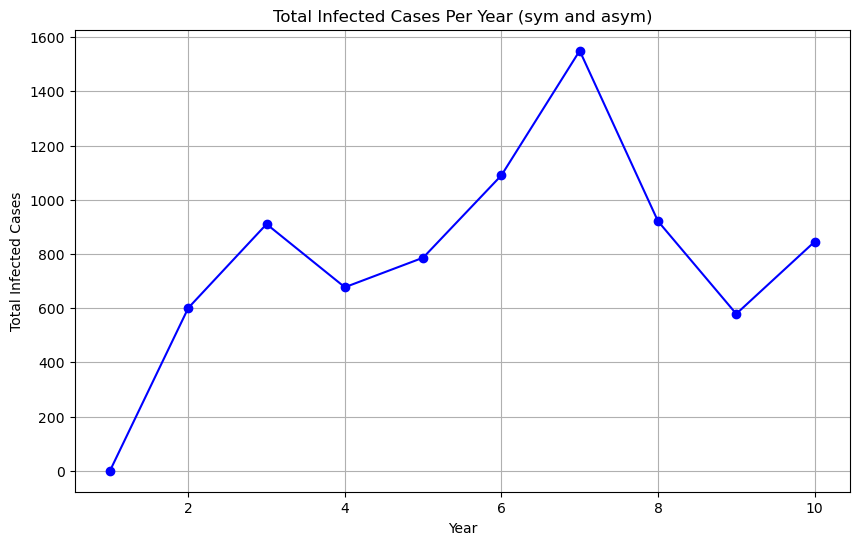

In [10]:
num_year = 10
year_indices = [365 * (i ) for i in range(num_year)]  # 3650 days / 365 days per year = 10 years

# Get accumulated cases at the end of each year
accumulated_cases_per_year = [df.loc[idx, 'total_I'] for idx in year_indices]

# Calculate cases accumulated each year by taking the difference between consecutive years
# You can use `numpy.diff` to compute the differences between consecutive values in a list/array
import numpy as np
cases_per_year = np.diff([0] + accumulated_cases_per_year)  # Adding a 0 to get the first year as well

# Plot the cases per year
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cases_per_year) + 1), cases_per_year, marker='o', linestyle='-', color='b', label='Cases per Year')
plt.xlabel('Year')
plt.ylabel('Total Infected Cases')
plt.title('Total Infected Cases Per Year (sym and asym)')
plt.grid(True)
plt.show()